In [1]:
# Monte Carlo valuation of European Barrier Option
# Barrier Option type is knock-out option/up and out 
# This option ceases to exist when price exceeds a barrier level L
# The value of call option goes to 0 when S_t > L between 0 and T(maturity)

In [2]:
# Import modules

import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
# Market and modelling values and dynamics

N           = [i*1000 for i in range(1,51)]      # sample sizes 1000,2000,3000....50,000
dT          = 1/12                               # track share price monthly 
paths       = 1/dT                               # price observation points between (0,T]

# Dynamics of market, share and European-up-and-out call option

S_0         = 100                                # inital price of share price
K           = 100                                # strike price 
L           = 150                                # up and out barrier level
T           = 1                                  # time to maturity of option 1 year
r           = 0.08                               # continously compounded risk free rate
sigma_share = 0.3                                # the volatility of share 


# Counterparty firms dynamics

V_0         = 200                                # initial firm value
D           = 175                                # firm debt due in 1 year
sigma_firm  = 0.25                               # the volatility of firm value 
r_r         = 0.25                               # the recovery rate with counterparty

# Correlations share and firm 

corr        = 0.2                                # correlation between counterparty and underlying share
corr_matrix = np.array([[1,corr],[corr,1]])      # correlation matrix stock and firm

In [4]:
# Functions based on Merton Model, Black-Schooles, Risk Free Pricing, Payout dynamics option to help us value option 

def terminal_value(S_0,r, sigma, Z,T):
    """
    model final price based on geometric brownian motion
    """
    return S_0*(np.exp((r-sigma**2/2)*T + sigma*np.sqrt(T)*Z))

# Function to generate share prices over time until final period e.g monthly here
def share_path(S_0,r,sigma,Z,dT):
    """
    Generates share prices given some random normal values (Z) 
    with adjustment of cumsum to capture share prices over time as 
    result of individual changes up to that point
    """
    return S_0*np.exp(np.cumsum((r-sigma**2/2)*dT + sigma*np.sqrt(dT)*Z,1))

def discounted_option_payoff(share_paths,K,L):
    
    """
    takes paths of share (monthly samples) over life of share 
    returns 0 if share price rises above L(barrier) during life of option
    returns normall discounted call payoff at maturity if share price never exceed barrier value
    """    
    if(np.any(share_paths>L)):
        return 0
    else:
        return np.exp(-r*T)*np.maximum(share_paths[-1]-K,0) 

In [6]:
# Monte Carlo valuation without risk of default
# Will use 50 different type of samples sizes in N (1000, 2000, 3000....)

value_no_default     = [None]*50       # resulting call estimate values from valuation - storage
std_no_default       = [None]*50       # resulting call estimate standard deviation - storage
length_samples       = len(N)

for i in range(length_samples):
    
    discounted_payoffs = [None]* N[i]    # create storage for N discounted payoff estimates
    length_discounted_payoffs = len(discounted_payoffs)
    
    for j in range(length_discounted_payoffs):
        
        Z = norm.rvs(size = [1,12])
        share_paths  = share_path(S_0,r,sigma_share,Z,dT) 
        call_payoffs = discounted_option_payoff(share_paths[0],K,L)
        discounted_payoffs[j] = call_payoffs
    
    value_no_default[i] = np.mean(discounted_payoffs)
    std_no_default[i]   = np.std(discounted_payoffs)/np.sqrt((i+1)*1000)    

In [7]:
value_no_default

[6.355104697066181,
 6.519193201190645,
 7.118037996720409,
 6.751912450063174,
 6.904138313267359,
 6.6423754639015264,
 6.85736269975937,
 6.5825310947645,
 6.8425624479618,
 6.6886042483324095,
 6.672168422039908,
 6.614646475568443,
 6.571953093752243,
 6.872919471753316,
 6.856134542564033,
 6.797061270634421,
 6.692519678398657,
 6.728582738149918,
 6.771816190992509,
 6.614961560308601,
 6.681220584399178,
 6.664283231143742,
 6.622032733434779,
 6.659653050740702,
 6.719544735838121,
 6.635609353716034,
 6.665294795124304,
 6.79671125052401,
 6.710242605764166,
 6.8226788488551415,
 6.714518533654017,
 6.717621536477931,
 6.779160919520906,
 6.7574135575588805,
 6.695633772902092,
 6.7491300687341935,
 6.6675397946249975,
 6.685049580709251,
 6.676729485180144,
 6.711099249678032,
 6.571306686110265,
 6.75789742884904,
 6.686545544523792,
 6.5888169060675255,
 6.724330887844371,
 6.750233332526679,
 6.737373713838008,
 6.7067867163266435,
 6.644965256500857,
 6.696950565011853]

In [8]:
std_no_default

[0.3477028949905183,
 0.24643094860196268,
 0.21281182065661558,
 0.1768746312445474,
 0.15861764537560505,
 0.14465109808561677,
 0.13480518782838713,
 0.12351330105894665,
 0.11948086743726855,
 0.1121533011353884,
 0.1051132325559281,
 0.10170952934346823,
 0.09701732089543616,
 0.09576572373026303,
 0.09249162259241576,
 0.08910818925889434,
 0.08606029545901979,
 0.08331109719467804,
 0.08190398552357354,
 0.07833941441806781,
 0.07689093757875982,
 0.07518433384504512,
 0.07286147788280693,
 0.07200859803521976,
 0.07068614107423728,
 0.06910041463216893,
 0.06802461307041187,
 0.0673434697265238,
 0.06564852506411045,
 0.06532525101034087,
 0.06350498314791728,
 0.06238864337161356,
 0.061923627541866824,
 0.06083245194975101,
 0.059923182650788186,
 0.05944705999760261,
 0.058302395818541165,
 0.05733987885030189,
 0.0565291478816969,
 0.055924054007423826,
 0.054566755437506685,
 0.05480125570666773,
 0.05411787308085943,
 0.05290245323321474,
 0.052717137925964185,
 0.0525461

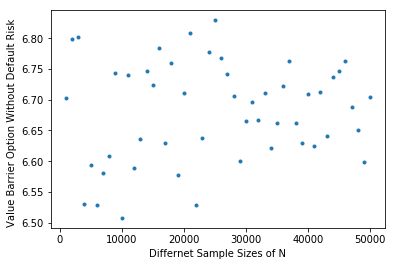

In [50]:
#  Plot valuation of European up and out option at various sample sizes N Monte Carlo valuation

plt.plot(N,value_no_default,'.')
plt.xlabel("Different Sample Sizes of N")
plt.ylabel("Value Barrier Option Without Default Risk  ")
plt.show()

In [15]:
# Monte Carlo valuation taking into account risk of default
# Monte Carlo valuation taking into account correlation firm and share price
# Monte Carlo valution for different sizes of N

cva_estimates       = [None]*50   # storage - resulting CVA value at each sample size N
std_estimates       = [None]*50   # storage - resulting standard deviation CVA at each sample size N
valuations_temp     = [None]*50


for i in range(length_samples):
    
    discounted_payoffs = [None]*N[i]     # create storage for N discounted payoff estimates
    length_discounted_payoffs = len(discounted_payoffs)
    
    Z                   = norm.rvs(size =[2,(i+1)*1000])  
    corr_norm_matrix    = np.matmul(np.linalg.cholesky(corr_matrix),Z)  
   
    for j in range(length_discounted_payoffs):
        
        Z      = norm.rvs(size = [1,12])
        #Z_corr = np.matmul(np.linalg.cholesky(corr_matrix),Z)
        
        share_paths  = share_path(S_0,r,sigma_share,Z,dT) 
        call_payoffs = discounted_option_payoff(share_paths[0],K,L)
        discounted_payoffs[j] = call_payoffs

    call_value          = np.mean(discounted_payoffs)        
    terminal_firm_value = terminal_value(V_0,r,sigma_firm,corr_norm_matrix[1],T)

    amount_lost          = np.exp(-r*T)*(1-r_r)*(terminal_firm_value<D)*call_value
    
    cva_estimates[i]     = np.mean(amount_lost)
    std_estimates[i]     = np.std(amount_lost)/np.sqrt((i+1)*1000)

In [16]:
cva_estimates

[1.2329877091322266,
 1.2124199951759036,
 1.1283263226875087,
 1.1054769215272544,
 1.1449502653992498,
 1.1695618899417057,
 1.0604650292652469,
 1.07391850354363,
 1.1009446909921201,
 1.0469089748193012,
 1.1010923396327121,
 1.0546189399206853,
 1.0457990255688123,
 1.0626785001806873,
 1.0527929117263708,
 1.0964115268547325,
 1.066505856663138,
 1.0889801281852762,
 1.0303466079113155,
 1.094467817175479,
 1.0620830415656608,
 1.1010408615570082,
 1.0900721815900407,
 1.0860993713015905,
 1.0800008136973893,
 1.0850573040943676,
 1.098734279259945,
 1.076357956261152,
 1.0815136136586343,
 1.1029668167409663,
 1.0947291005770723,
 1.1185468151409552,
 1.070380318926923,
 1.0902723516803674,
 1.0911358045989301,
 1.0994536996687787,
 1.063819033535832,
 1.0861841539701882,
 1.1026205414470844,
 1.0717707259163665,
 1.0717985523870548,
 1.0835846968072662,
 1.0677370551780572,
 1.08604469259416,
 1.047872437412833,
 1.0840598029818307,
 1.0681456010934216,
 1.0740515419926457,
 1.

In [17]:
std_estimates

[0.06682074337830582,
 0.046036013059669596,
 0.03692853727737868,
 0.031362291043686125,
 0.028672486816345502,
 0.026398591139818278,
 0.023061308683772822,
 0.022420283192698138,
 0.020714301949234522,
 0.019106817793677688,
 0.019130632137273892,
 0.01779525843715535,
 0.016775265809420205,
 0.016288611035504198,
 0.015805553304498992,
 0.015547179793788952,
 0.014946642278649586,
 0.014635654814571993,
 0.013771065821269041,
 0.013932197237830296,
 0.0133169728786596,
 0.013376429721455328,
 0.012924694509003935,
 0.01265059812063768,
 0.01252331505052706,
 0.012185556977786319,
 0.012182449731756239,
 0.011732861354132722,
 0.011537129490649608,
 0.01150116240400694,
 0.011183072087542477,
 0.011200950920237616,
 0.010754408353281113,
 0.010654284875147134,
 0.010558290457103277,
 0.010412333004709876,
 0.010080795576313901,
 0.009995510251257294,
 0.010034382726294443,
 0.009758302902331685,
 0.009663775679653182,
 0.009621280447644992,
 0.009359266020065208,
 0.0093569114165630

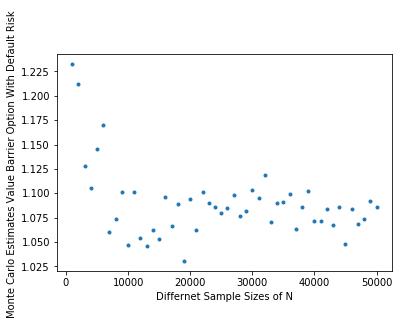

In [18]:
# Plots CVA estiamtes gainst various sample sizes

plt.plot(N,cva_estimates,'.')
plt.xlabel("Differnet Sample Sizes of N")
plt.ylabel("Monte Carlo Estimates Value Barrier Option With Default Risk ")
plt.show()

In [20]:
# Price/value European up and out option taking into account default risk Normal Price - CVA 

price = [value_no_default[i] - cva_estimates[i] for i in range(50)]
price

[5.122116987933954,
 5.306773206014741,
 5.9897116740329,
 5.646435528535919,
 5.7591880478681095,
 5.4728135739598205,
 5.796897670494123,
 5.50861259122087,
 5.74161775696968,
 5.6416952735131085,
 5.571076082407195,
 5.560027535647757,
 5.5261540681834305,
 5.810240971572629,
 5.803341630837662,
 5.700649743779689,
 5.626013821735519,
 5.639602609964642,
 5.7414695830811935,
 5.520493743133122,
 5.619137542833517,
 5.5632423695867335,
 5.531960551844738,
 5.573553679439112,
 5.6395439221407315,
 5.5505520496216665,
 5.566560515864358,
 5.720353294262858,
 5.628728992105532,
 5.719712032114176,
 5.619789433076945,
 5.599074721336976,
 5.7087806005939825,
 5.667141205878513,
 5.6044979683031615,
 5.649676369065415,
 5.603720761089166,
 5.598865426739063,
 5.5741089437330595,
 5.639328523761666,
 5.499508133723211,
 5.674312732041773,
 5.618808489345735,
 5.502772213473365,
 5.676458450431538,
 5.666173529544848,
 5.6692281127445865,
 5.632735174333998,
 5.553072863715208,
 5.610634578

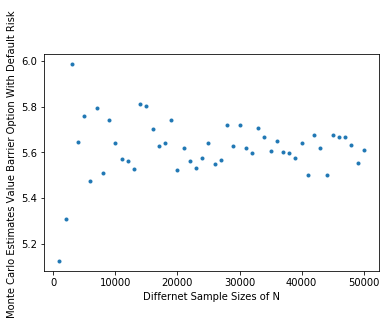

In [21]:

# Plots default risk adjusted price against various sample sizes

plt.plot(N,price,'.')
plt.xlabel("Differnet Sample Sizes of N")
plt.ylabel("Monte Carlo Estimates Value Barrier Option With Default Risk ")
plt.show()